# Project: Titanic - Machine Learning from Disaster

# 1: loading data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
train = pd.read_csv('C:/Users/Hp/OneDrive/Documents/train.csv')
gender_submission = pd.read_csv('C:/Users/Hp/OneDrive/Documents/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


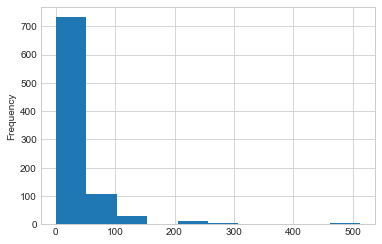

In [4]:
train.Fare.plot.hist()

In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


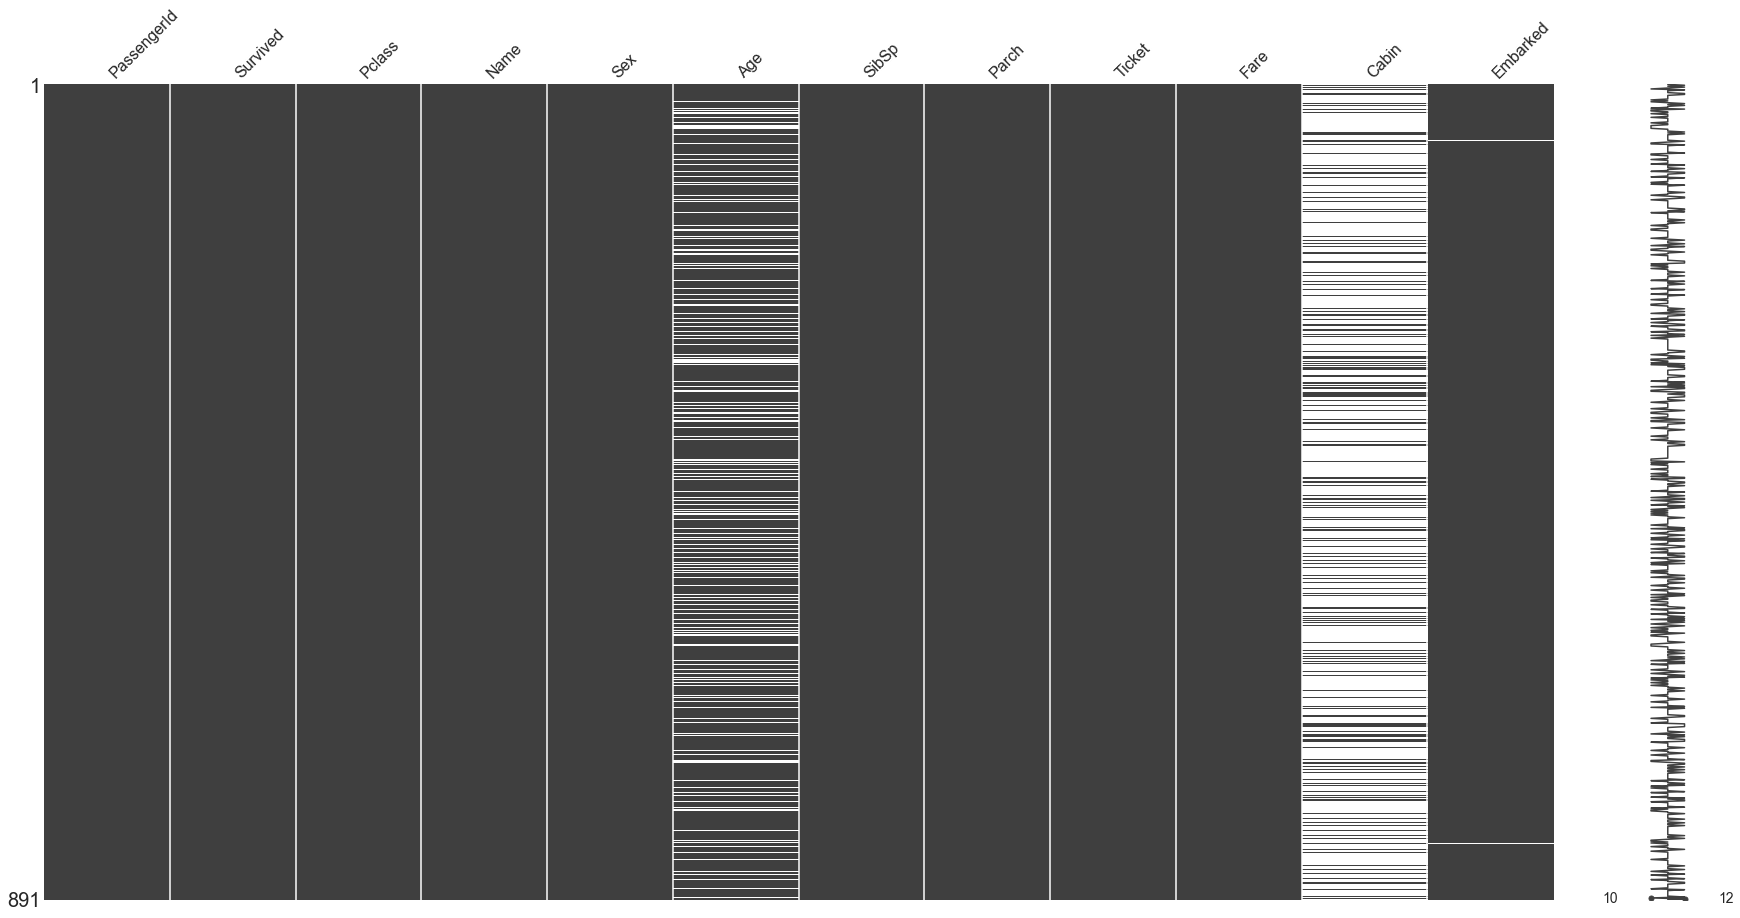

In [7]:
#Missing values
import missingno
missingno.matrix(train, figsize=(30,15))

Here we can see some missing values in column Age, Cabin and Embarked. 

In [8]:
# alternate way
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2: EDA
### create two new dataframe for discrete and continuous variables

In [9]:
tn_bin = pd.DataFrame()
tn_con = pd.DataFrame()

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Exploring each of these features individually
Note: IF there is n numbers of features in dataset, we can directly use the PCA to find out the most important features.

### 1) Survived

0    549
1    342
Name: Survived, dtype: int64


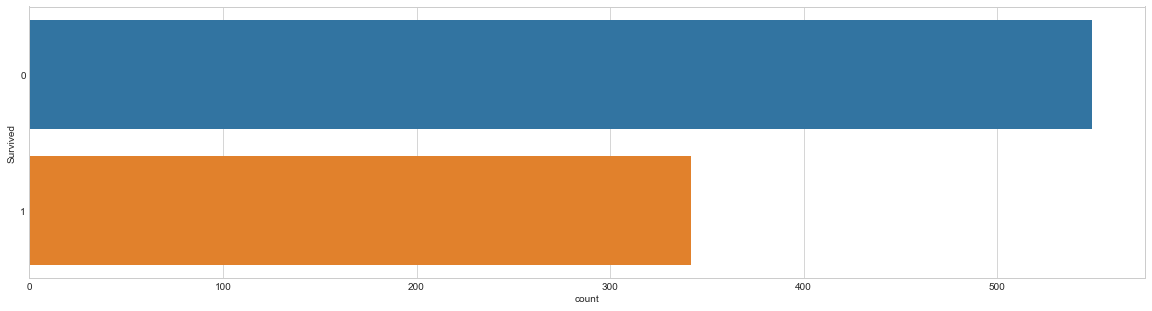

In [11]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [12]:
#Add this to our datset
tn_bin['Survived'] = train['Survived']
tn_con['Survived'] = train['Survived']

In [13]:
tn_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### 2) Pclass

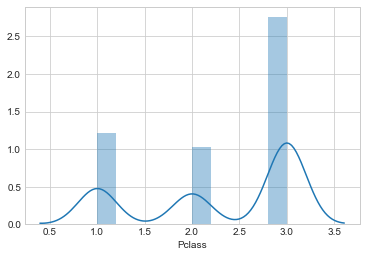

In [14]:
sns.distplot(train.Pclass)

In [15]:
tn_bin['Pclass'] = train['Pclass']
tn_con['Pclass'] = train['Pclass']

In [16]:
tn_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


### 3) Name

In [17]:
#how many different names are there?
train.Name.value_counts()

Abbott, Mrs. Stanton (Rosa Hunt)                        1
Quick, Miss. Phyllis May                                1
Futrelle, Mr. Jacques Heath                             1
Elias, Mr. Tannous                                      1
Davis, Miss. Mary                                       1
                                                       ..
Jardin, Mr. Jose Neto                                   1
Ryerson, Miss. Susan Parker "Suzette"                   1
Angle, Mrs. William A (Florence "Mary" Agnes Hughes)    1
Adahl, Mr. Mauritz Nils Martin                          1
Reed, Mr. James George                                  1
Name: Name, Length: 891, dtype: int64

**Note:** Becasue of so many different names and to keep this EDA fast, we won't condsider this feature.

### 4) Sex

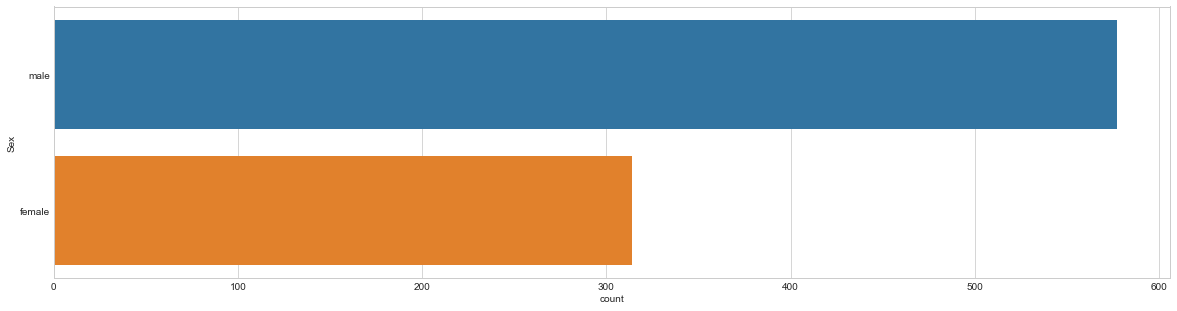

In [18]:
#Distribution od Sex
plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train)

In [19]:
tn_bin['Sex'] = train['Sex']
tn_bin['Sex'] = np.where(tn_bin['Sex'] == 'male',0,1)
tn_con['Sex'] = train['Sex']
tn_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


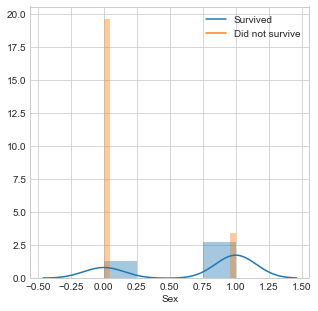

In [20]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(5,5))
sns.distplot(tn_bin.loc[tn_bin['Survived']==1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(tn_bin.loc[tn_bin['Survived']==0]['Sex'], kde_kws={'label':'Did not survive'})

**Note:** Not many people survived. But of those who did, more were female.

### 5) Age

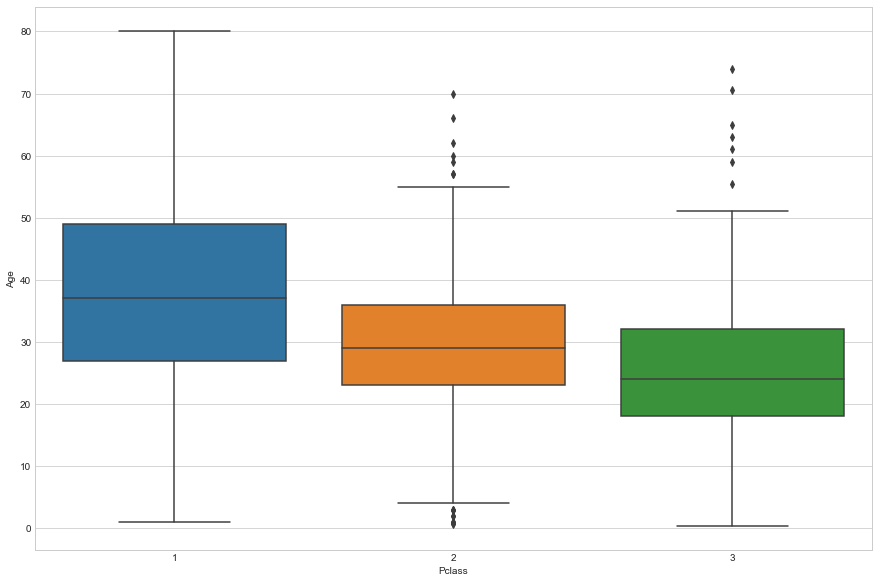

In [21]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age',data=train)

In [22]:
def fill_nullval_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
train['Age'] = train[['Age','Pclass']].apply(fill_nullval_age, axis=1)

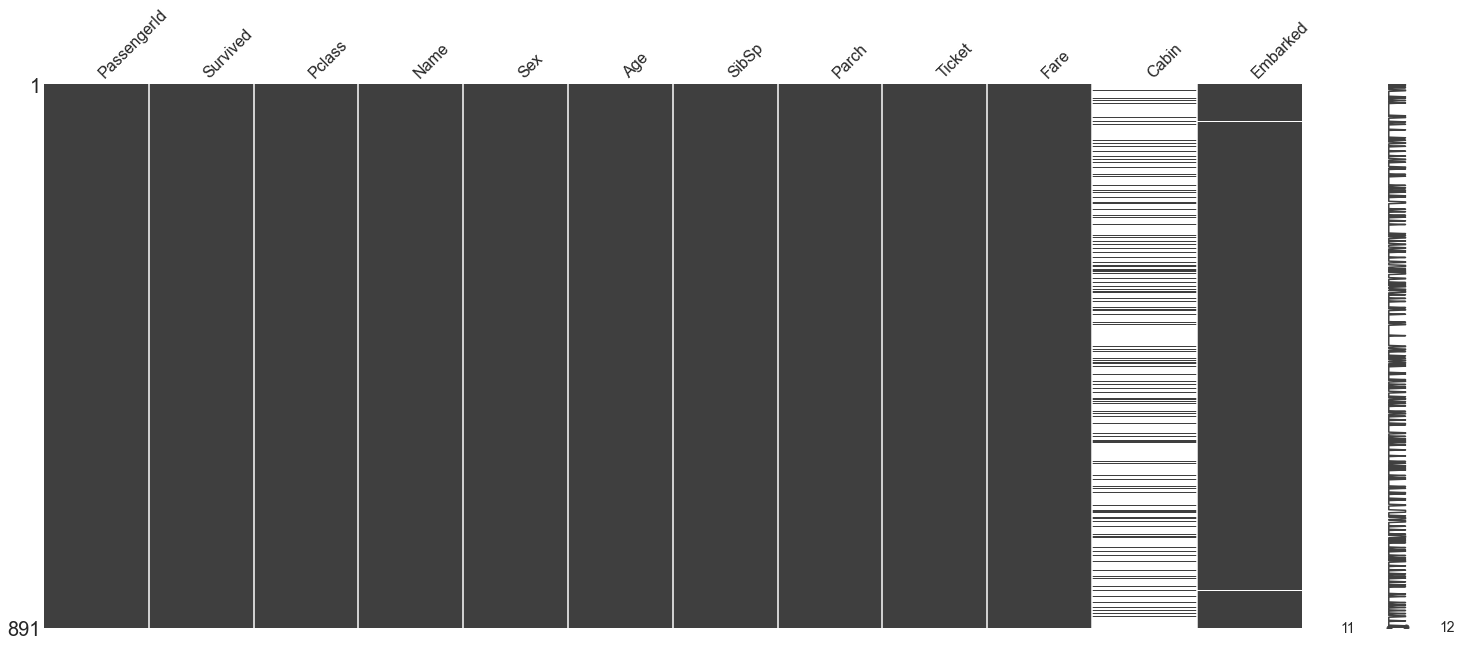

In [24]:
missingno.matrix(train)

In [25]:
tn_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
tn_bin['Age'] = pd.cut(train['Age'],10)
tn_con['Age'] = train['Age']

In [28]:
tn_bin.head(10)

,Survived,Pclass,Sex,Age
0,0,3,0,"(16.336, 24.294]"
1,1,1,1,"(32.252, 40.21]"
2,1,3,1,"(24.294, 32.252]"
3,1,1,1,"(32.252, 40.21]"
4,0,3,0,"(32.252, 40.21]"
5,0,3,0,"(16.336, 24.294]"
6,0,1,0,"(48.168, 56.126]"
7,0,3,0,"(0.34, 8.378]"
8,1,3,1,"(24.294, 32.252]"
9,1,2,1,"(8.378, 16.336]"


In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

## 6) sibsp

In [31]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

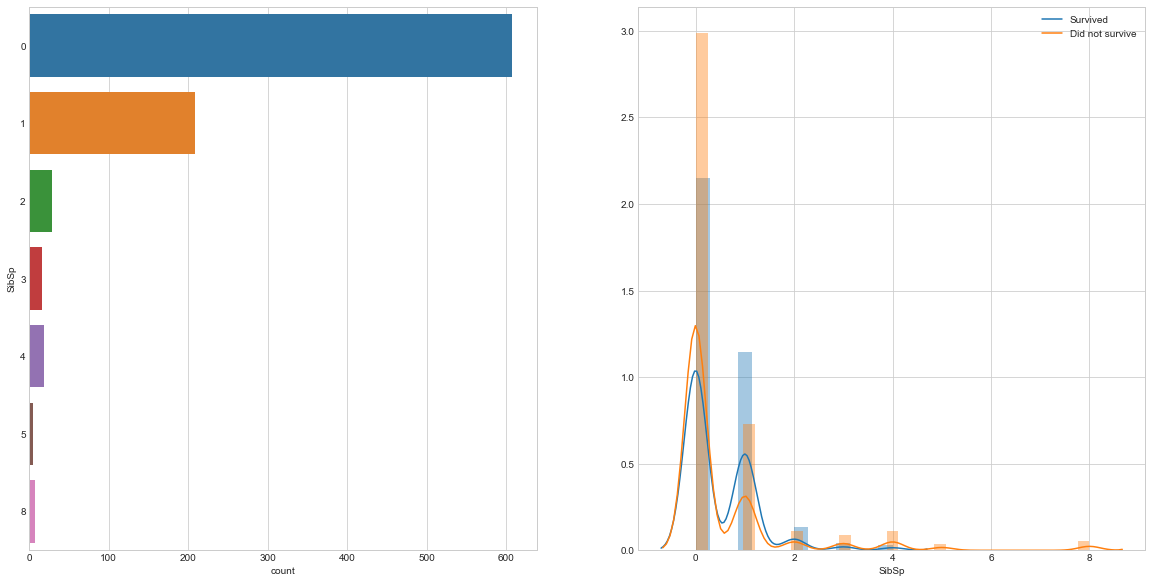

In [32]:
#visualise the counts pf sibsp and the distribution of the values against survived
plot_count_dist(train,bin_df=tn_bin,label_column='Survived',target_column='SibSp', figsize=(20,10))

In [33]:
#add sibsp to subset data
tn_bin['SibSp'] = train['SibSp']
tn_con['SibSp'] = train['SibSp']

## 7) Parch

In [34]:
train.Parch.isnull().sum()

0

In [35]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


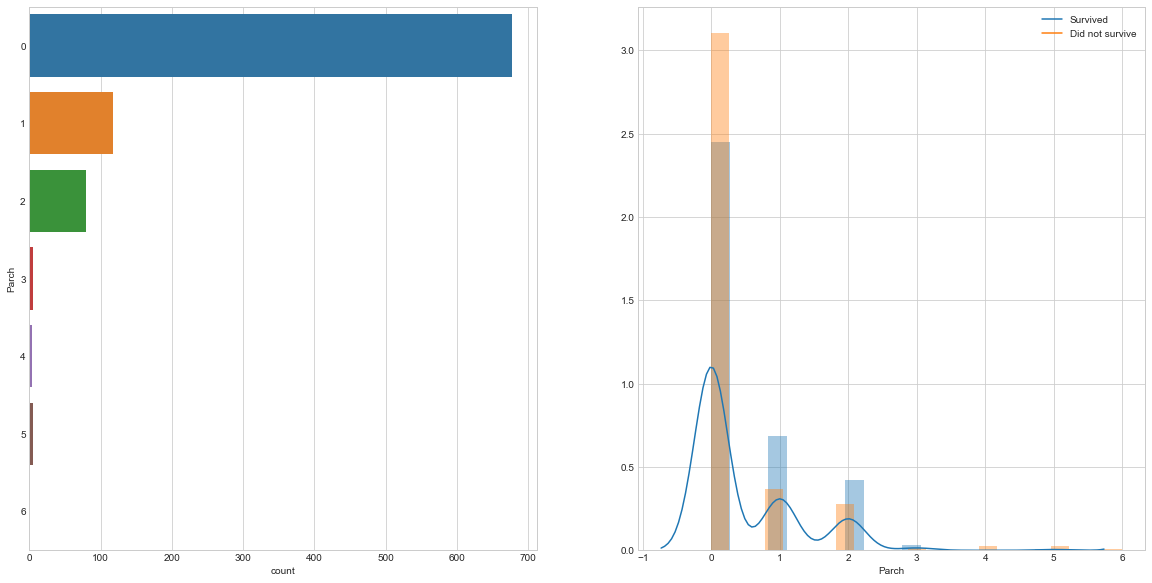

In [36]:
plot_count_dist(
train,  bin_df=tn_bin,
label_column='Survived',
target_column='Parch',
figsize=(20,10))

In [37]:
#add parch to subset data
tn_bin['Parch'] = train['Parch']
tn_con['Parch'] = train['Parch']

In [38]:
tn_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## 8) Tickets

In [39]:
train.Ticket.isnull().sum()

0

In [40]:
train.Ticket.value_counts()

1601               7
347082             7
CA. 2343           7
CA 2144            6
3101295            6
                  ..
SOTON/OQ 392089    1
C.A. 18723         1
347069             1
2667               1
348121             1
Name: Ticket, Length: 681, dtype: int64

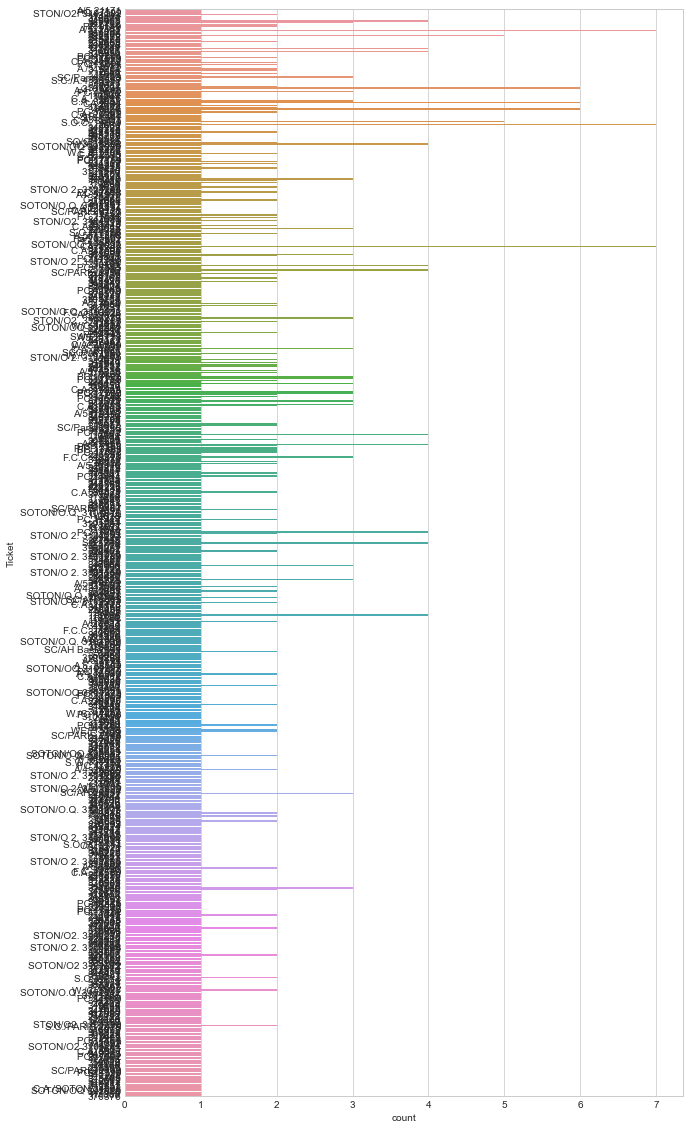

In [41]:
fig = plt.figure(figsize=(10,20))
sns.countplot(y='Ticket', data=train)

**Note:** As there is too many different ticket names. So we won't use this feature in our subset data.

## 9) Fare

In [42]:
train.Fare.isnull().sum()

0

**Note:** As fare is a float. let's add it to our continuous subset data but to add it to our categorical subet, we will cut it into bins. 

In [43]:
tn_bin['Fare'] = pd.cut(train['Fare'], bins=5)
tn_con['Fare'] = train['Fare']

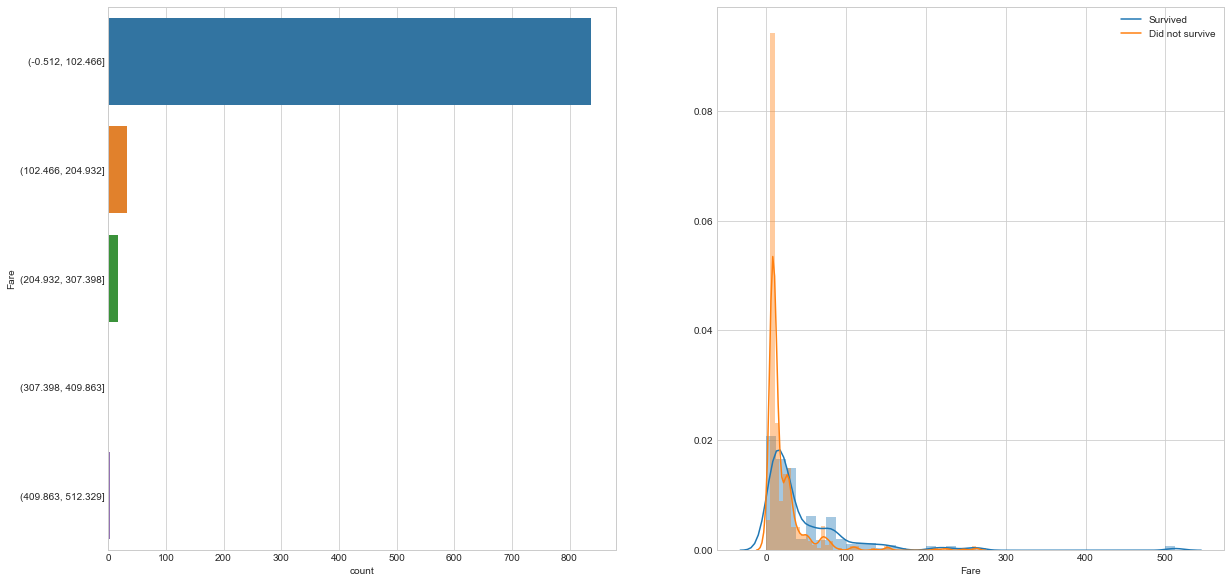

In [44]:
plot_count_dist(data=train,
                bin_df=tn_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

## 10) Cabin

In [45]:
train.Cabin.isnull().sum()

687

**Note:** As there is too many missing values present in dataset. we won't use cabin for our initial model.

## 11) Embarked

In [46]:
train.Embarked.isnull().sum()

2

In [47]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

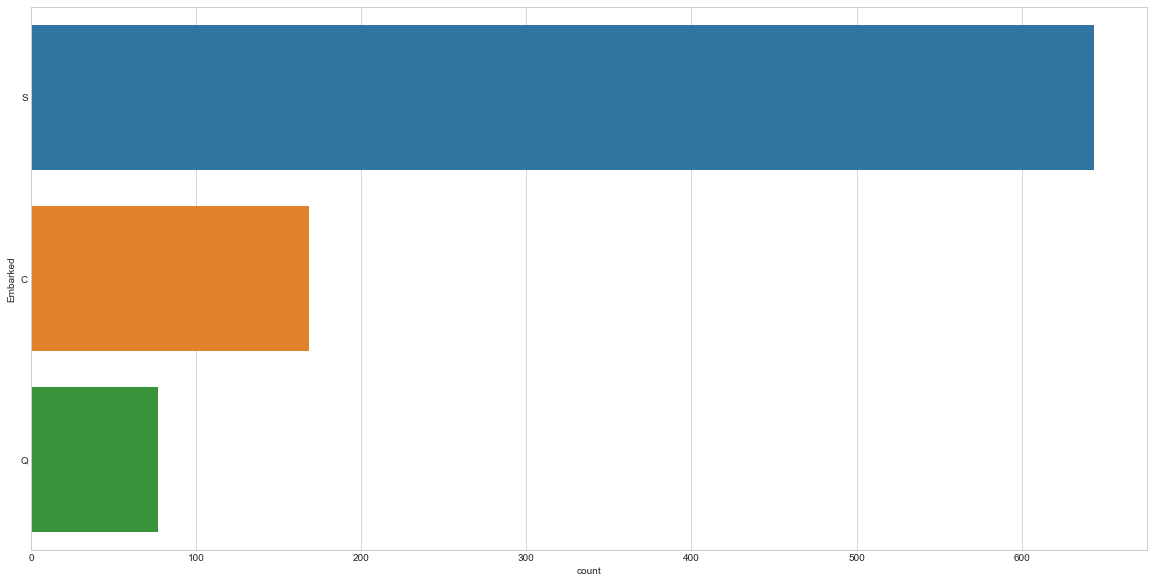

In [48]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Embarked', data=train)

In [49]:
tn_bin['Embarked'] = train['Embarked']
tn_con['Embarked'] = train['Embarked']

In [50]:
print(len(tn_bin))
tn_bin = tn_bin.dropna(subset=['Embarked'])
tn_con = tn_con.dropna(subset=['Embarked'])
print(len(tn_con))

891
889


# 3. Feature Encoding

**Note:** Now we have our two subset ready. now we can encode the features so they are ready to be used with our ML models.

In [51]:
tn_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


In [52]:
#preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

In [53]:
#onehot encode binned variables
one_hot_cols = tn_bin.columns.tolist()
one_hot_cols.remove('Survived')
tn_bin_enc = pd.get_dummies(tn_bin, columns=one_hot_cols)
tn_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 8.378]","Age_(8.378, 16.336]","Age_(16.336, 24.294]","Age_(24.294, 32.252]",...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
tn_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
# One hot encode the categorical columns
tn_embarked_one_hot = pd.get_dummies(tn_con['Embarked'], 
                                     prefix='embarked')

tn_sex_one_hot = pd.get_dummies(tn_con['Sex'], 
                                prefix='sex')

tn_plcass_one_hot = pd.get_dummies(tn_con['Pclass'], 
                                   prefix='pclass')

In [56]:
# Combine the one hot encoded columns with df_con_enc
tn_con_enc = pd.concat([tn_con, 
                        tn_embarked_one_hot, 
                        tn_sex_one_hot, 
                        tn_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
tn_con_enc = tn_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [57]:
tn_con_enc.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


# 4. Machine learning model

In [58]:
# SELECT X and Y:
selected_tn = tn_con_enc

In [59]:
selected_tn.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [60]:
x_train = selected_tn.drop('Survived', axis=1)
y_train = selected_tn.Survived

In [61]:
x_train.shape

(889, 12)

In [62]:
x_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [63]:
xtrain1 = x_train.iloc[:].values
ytrain1 = y_train.iloc[:].values

In [64]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain1[:,[0,3]] = sc.fit_transform(xtrain1[:,[0,3]])

### Defining a function to fit the machine learning algorithms

In [65]:
#Libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
def fit_ml_algo(algo, x_train, y_train, cv):
    
    #onepass
    model = algo.fit(x_train,y_train)
    AC = round(model.score(x_train,y_train)*100, 2)
    
    #cross-validation
    tn_pred = model_selection.cross_val_predict(algo, x_train,y_train,cv=cv, n_jobs= -1)
    
    #cross-val accuracy
    AC_cv = round(metrics.accuracy_score(y_train, tn_pred)*100, 2)
    
    return tn_pred, AC, AC_cv

## Logistic Regression

In [67]:
tn_pred_log, log_AC, log_AC_cv = fit_ml_algo(LogisticRegression(), xtrain1,ytrain1, 10)

print('Accuracy:%s' % log_AC)
print('Accuracy CV 10-fold:%s' % log_AC_cv)

Accuracy:80.54
Accuracy CV 10-fold:79.98


## K-Nearest Neighbours

In [68]:
tn_pred_knn, knn_AC, knn_AC_cv = fit_ml_algo(KNeighborsClassifier(), xtrain1,ytrain1, 10)

print('Accuracy:%s' % knn_AC)
print('Accuracy CV 10-fold:%s' % knn_AC_cv)

Accuracy:86.73
Accuracy CV 10-fold:80.2


## Gaussian Naive Bayes

In [69]:
tn_pred_gnb, gnb_AC, gnb_AC_cv = fit_ml_algo(GaussianNB(), x_train,y_train, 10)

print('Accuracy:%s' % gnb_AC)
print('Accuracy CV 10-fold:%s' % gnb_AC_cv)

Accuracy:78.4
Accuracy CV 10-fold:78.29


## Linear SVM (SVC)

In [70]:
tn_pred_svm, svm_AC, svm_AC_cv = fit_ml_algo(LinearSVC(), xtrain1,ytrain1, 10)

print('Accuracy:%s' % svm_AC)
print('Accuracy CV 10-fold:%s' % svm_AC_cv)

Accuracy:80.65
Accuracy CV 10-fold:79.87


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Stochastic Gradient Descent

In [71]:
tn_pred_sgd, sgd_AC, sgd_AC_cv = fit_ml_algo(SGDClassifier(), xtrain1,ytrain1, 10)

print('Accuracy:%s' % sgd_AC)
print('Accuracy CV 10-fold:%s' % sgd_AC_cv)

Accuracy:76.49
Accuracy CV 10-fold:78.07


## Decision Tree Classifier

In [72]:
tn_pred_dt, dt_AC, dt_AC_cv = fit_ml_algo(DecisionTreeClassifier(), x_train,y_train, 10)

print('Accuracy:%s' % dt_AC)
print('Accuracy CV 10-fold:%s' % dt_AC_cv)

Accuracy:98.2
Accuracy CV 10-fold:78.97


## Random Forest Classifier

In [73]:
tn_pred_rfc, rfc_AC, rfc_AC_cv = fit_ml_algo(RandomForestClassifier(), x_train,y_train, 10)

print('Accuracy:%s' % rfc_AC)
print('Accuracy CV 10-fold:%s' % rfc_AC_cv)

Accuracy:98.2
Accuracy CV 10-fold:80.88


## Gradient Boost Trees

In [74]:
tn_pred_gbt, gbt_AC, gbt_AC_cv = fit_ml_algo(GradientBoostingClassifier(), x_train,y_train, 10)

print('Accuracy:%s' % gbt_AC)
print('Accuracy CV 10-fold:%s' % gbt_AC_cv)

Accuracy:88.64
Accuracy CV 10-fold:83.13


In [75]:
Classifier = GradientBoostingClassifier()

In [76]:
Classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [77]:
AC = round(Classifier.score(x_train,y_train)*100, 2)
AC

88.64

In [78]:
tn_pred = model_selection.cross_val_predict(Classifier, x_train,y_train,cv=10, n_jobs= -1)
AC_cv = round(metrics.accuracy_score(y_train, tn_pred)*100, 2)
AC_cv

83.24

# 5. Model Results

In [79]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'Random Forest Classifier'],
    'Accuracy Score': [
        knn_AC,  
        log_AC,  
        gnb_AC, 
        sgd_AC, 
        svm_AC, 
        dt_AC,
        gbt_AC,
        rfc_AC
    ],
    'CV Accuracy Score':[
        knn_AC_cv, 
        log_AC_cv,      
        gnb_AC_cv, 
        sgd_AC_cv, 
        svm_AC_cv, 
        dt_AC_cv,
        gbt_AC_cv,
        rfc_AC_cv
    ]

})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='CV Accuracy Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Accuracy Score,CV Accuracy Score
6,Gradient Boosting Trees,88.64,83.13
7,Random Forest Classifier,98.20,80.88
0,KNN,86.73,80.20
1,Logistic Regression,80.54,79.98
4,Linear SVC,80.65,79.87
5,Decision Tree,98.20,78.97
2,Naive Bayes,78.40,78.29
3,Stochastic Gradient Decent,76.49,78.07


**Note:** As we can see in above table Gradient Boosting Tree had the best CV results as compared to others. CV is more rebust than the just .fit() models as it does multiple passes over the data instead of one.

# 6. Submission

In [80]:
x_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [82]:
test = pd.read_csv('C:/Users/Hp/OneDrive/Documents/test.csv')

In [83]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [85]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

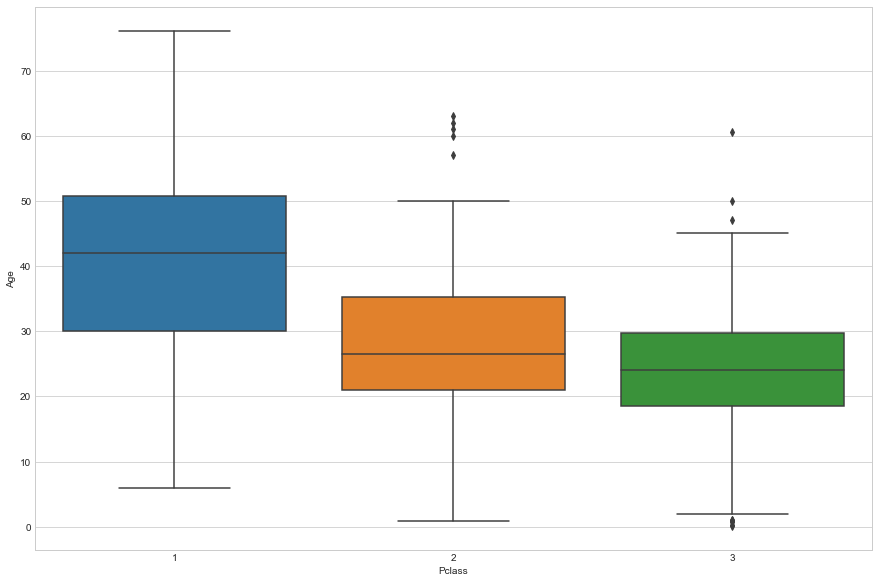

In [86]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age',data=test)

In [87]:
def fill_nullval_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 18
    else:
        return Age

In [88]:
test['Age'] = test[['Age','Pclass']].apply(fill_nullval_age_test, axis=1)

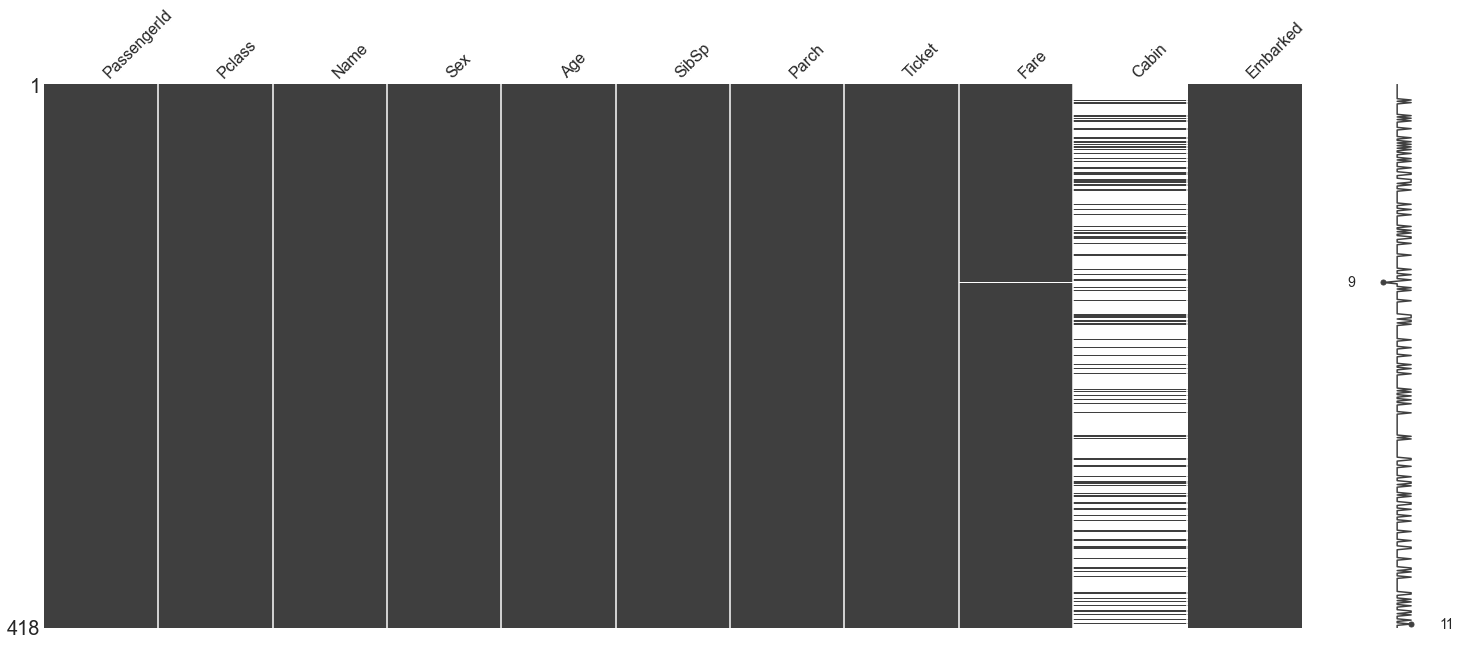

In [89]:
missingno.matrix(test)

In [90]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [91]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

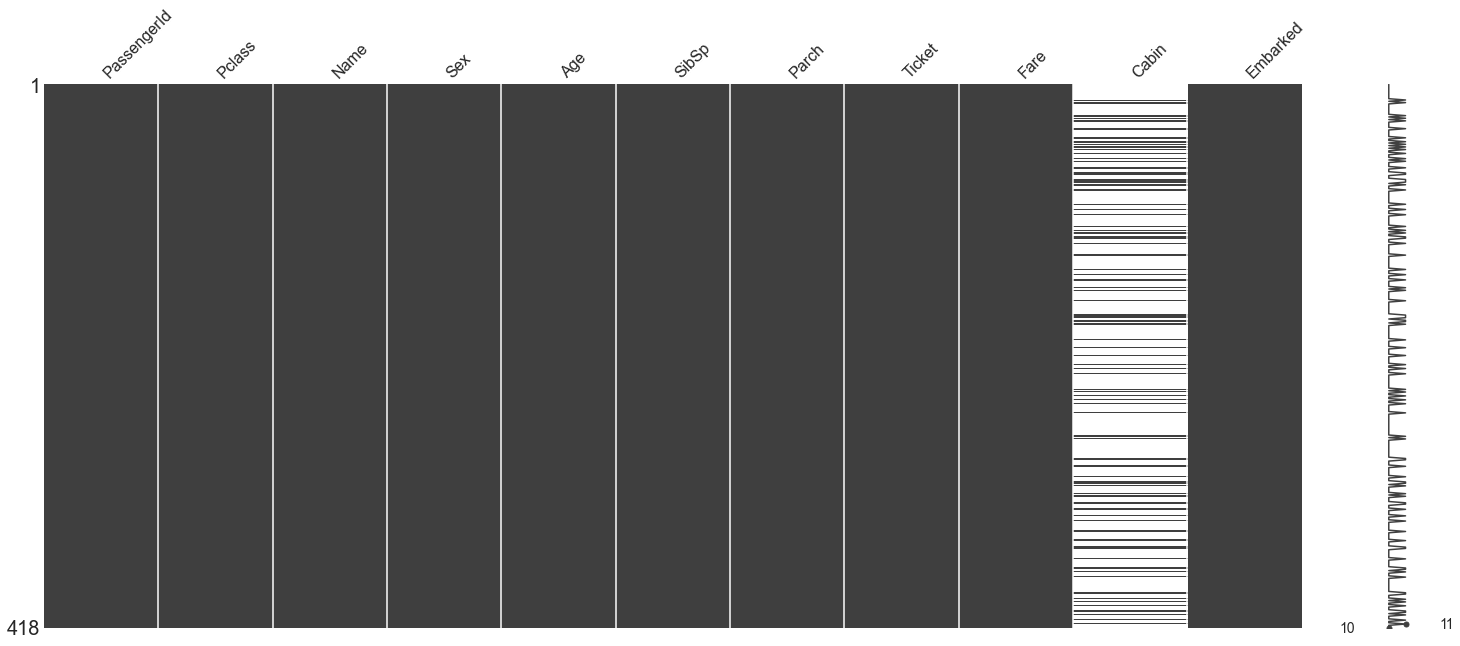

In [92]:
missingno.matrix(test)

In [93]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [95]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [96]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [98]:
# Create a list of columns to be used for the predictions
wanted_test_columns = x_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [99]:
test1 =test[wanted_test_columns]

In [100]:
test1.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [101]:
test1.dtypes

Age           float64
SibSp           int64
Parch           int64
Fare          float64
embarked_C      uint8
embarked_Q      uint8
embarked_S      uint8
sex_female      uint8
sex_male        uint8
pclass_1        uint8
pclass_2        uint8
pclass_3        uint8
dtype: object

In [104]:
predictions = Classifier.predict(test1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [107]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [108]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [109]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [110]:
# Convert submisison dataframe to csv for submission to csv 
submission.to_csv('C:/Users/Hp/OneDrive/Documents/Vishal_titanic_project_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


# Thank You